In [1]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Start working on a real dataset

We're going to use the House Price dataset we used last time ([link text](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv))

Try to upload the dataset on your Google Drive and access it through Colab.

In [2]:
# find the file on your system and copy and paste the path here
FILE_PATH = "./content/train.csv"
df = pd.read_csv(FILE_PATH)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# show all the columns
pd.set_option('display.max_columns', None)

In [4]:
# print the shape of the dataset
df.shape

(1460, 81)

In [5]:
# check the data types
df.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
# take a look at the first few records
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# take a look at the columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<Axes: >

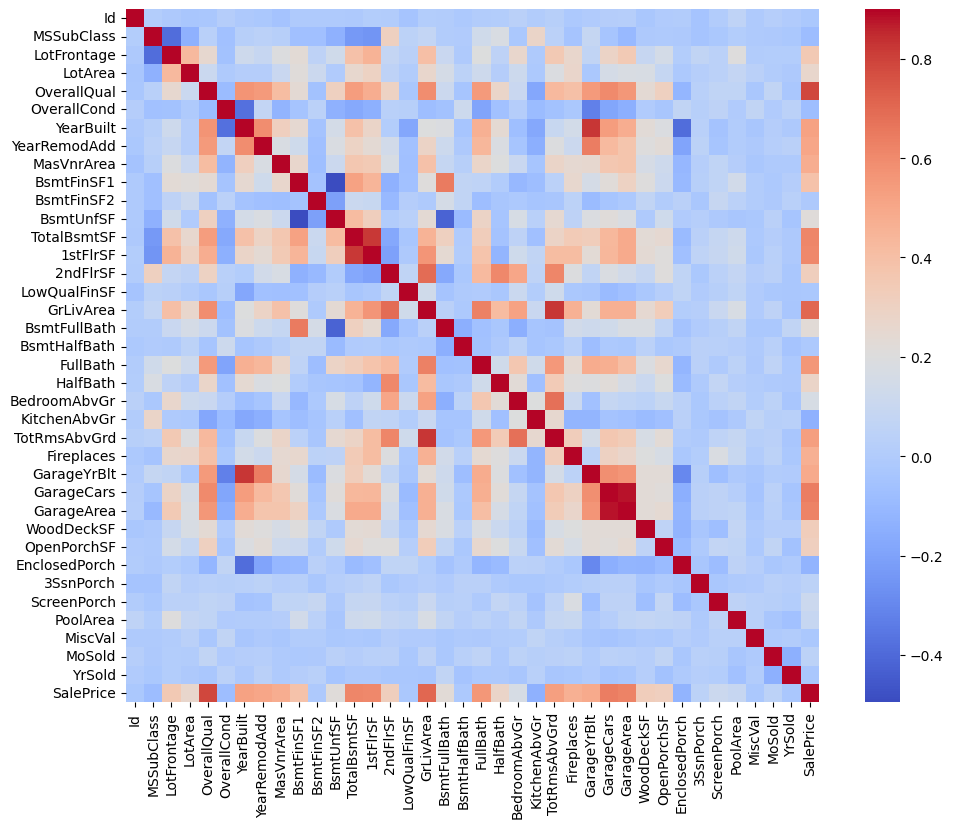

In [8]:
# look at the correlation of columns with .corr()
df = df.select_dtypes(include=[np.number])

corrmat = df.corr(numeric_only=True)
# plot the correlations with sns.heatmap
# Plotting the heatmap
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap='coolwarm')

The highest corrolations are with the following columns:
 Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')


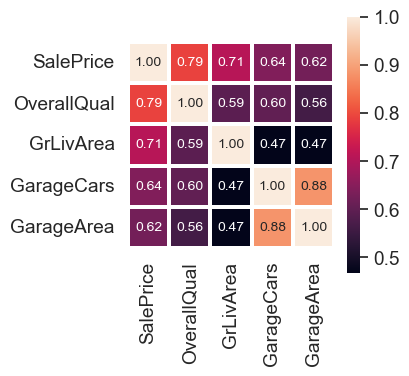

In [9]:
# run the code bellow to have a better view of corrolations
def plot_corr_matrix(df, nr_c, targ) :
    """
    A function for getting the features with the highest
    corrolation with the target variable.
    """

    # get the values
    corr = df.corr()
    corr_abs = corr.abs()

    # get the names in the largest to smallest order
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    # plot the figure
    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True,
                fmt='.2f', annot_kws={'size': 10},
                yticklabels=cols.values, xticklabels=cols.values)
    print('The highest corrolations are with the following columns:\n', cols)
    plt.show()

plot_corr_matrix(df, nr_c=5, targ='SalePrice')

In [10]:
# copy the list of columns printed out on the output of previous code cell
# and paste it here
columns_to_use = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

# filter the above columns of the dataset and save the new dataset into df_sample
df_sample = df[columns_to_use]
df_sample

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
0,208500,7,1710,2,548
1,181500,6,1262,2,460
2,223500,7,1786,2,608
3,140000,7,1717,3,642
4,250000,8,2198,3,836
...,...,...,...,...,...
1455,175000,6,1647,2,460
1456,210000,6,2073,2,500
1457,266500,7,2340,1,252
1458,142125,5,1078,1,240


In [11]:
# look into the number of nulls we have in df_sample
df_sample.isnull().sum()

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
dtype: int64

In [12]:
# take a look at the sampled dataset
df_sample

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea
0,208500,7,1710,2,548
1,181500,6,1262,2,460
2,223500,7,1786,2,608
3,140000,7,1717,3,642
4,250000,8,2198,3,836
...,...,...,...,...,...
1455,175000,6,1647,2,460
1456,210000,6,2073,2,500
1457,266500,7,2340,1,252
1458,142125,5,1078,1,240


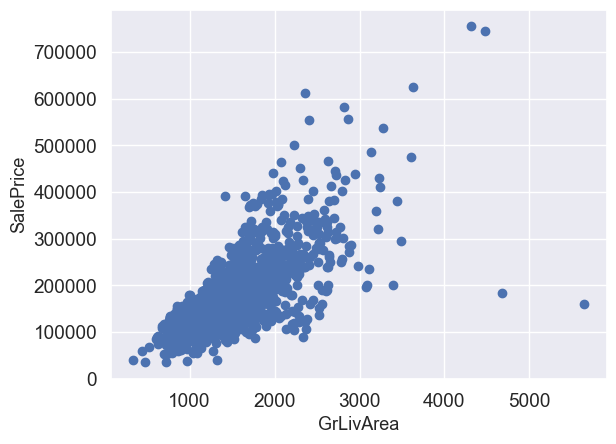

In [13]:
# plot GrLivArea against SalePrice with a scatter plot
fig, ax = plt.subplots()
ax.scatter(df_sample['GrLivArea'], df_sample['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

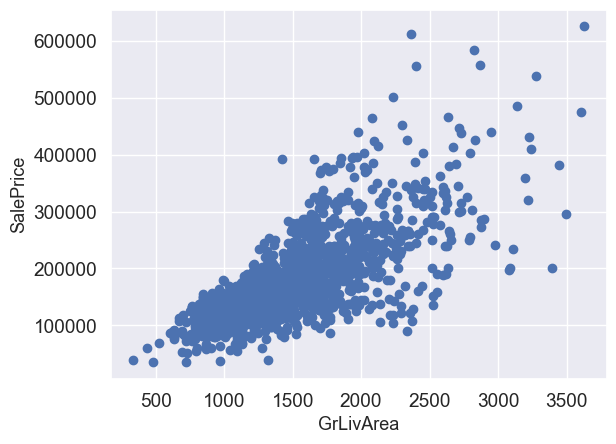

In [14]:
# Delete the outliers (ones that have GrLivArea more than 4000)
df_sample = df_sample.drop(df[df['GrLivArea']>4000].index)

# plot it again
fig, ax = plt.subplots()
ax.scatter(df_sample['GrLivArea'], df_sample['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [15]:
# create a variable called X_columns and put all the column names
# (except for your target column name) in it
x_columns = [ 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

print(x_columns)

# filter df_sample based on the x_column_names and your target name
X = df_sample[x_columns]
y = df_sample['SalePrice']

# build the train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']


In [16]:
X_train

,OverallQual,GrLivArea,GarageCars,GarageArea
1403,8,1464,3,754
1312,8,2810,2,750
680,6,923,1,264
639,8,1567,3,648
247,6,1375,2,451
...,...,...,...,...
765,9,1506,2,592
837,6,987,1,264
1219,6,1218,0,0
560,5,1392,2,528


In [17]:
X_test

,OverallQual,GrLivArea,GarageCars,GarageArea
511,7,1368,2,474
963,9,1800,2,702
231,8,2794,3,810
688,8,1419,2,567
34,9,1561,2,556
...,...,...,...,...
310,6,1501,2,420
1430,5,1838,2,372
40,6,1324,2,440
1243,10,2076,3,850


In [18]:
y_train

1403    282922
1312    302000
680     143000
639     264561
247     140000
         ...  
765     264132
837     100000
1219     91500
560     121500
685     207500
Name: SalePrice, Length: 1164, dtype: int64

In [19]:
y_test

511     202665
963     239000
231     403000
688     392000
34      277500
         ...  
310     165600
1430    192140
40      160000
1243    465000
75       91000
Name: SalePrice, Length: 292, dtype: int64

In [20]:
# import the libraries for regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
# Initialize and train a linear regression model
model = LinearRegression()
# Make predictions
lr = model.fit(X_train, y_train)
linear_predictions= model.predict(X_test)

# Evaluate the model

linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmae = np.sqrt(mean_squared_error(y_test, linear_predictions))

print(f"Mean Absolute Error {linear_mae}")
print(f"Root Mean Squared Error {linear_rmae}")


print("lr.coef_: ", lr.coef_)
print("lr.intercept_: ", lr.intercept_)
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Validation score: {:.2f}".format(lr.score(X_test, y_test)))

# underfitting


Mean Absolute Error 26496.382137918652
Root Mean Squared Error 36222.034607895774
lr.coef_:  [25670.87800551    53.63461431  4352.30134779    66.6415406 ]
lr.intercept_:  -96456.8123936801
Training score: 0.76
Validation score: 0.79


In [22]:
# Initialize and train a Ridge regression model
model = Ridge(alpha=0.2)


# Make predictions
ridge = model.fit(X_train, y_train)
ridge_predictions= ridge.predict(X_test)

# Evaluate the model

ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_rmae = np.sqrt(mean_squared_error(y_test, ridge_predictions))

print(f"Mean Absolute Error {ridge_mae}")
print(f"Root Mean Squared Error {ridge_rmae}")

# Evaluate the model
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Validation score: {:.2f}".format(ridge.score(X_test, y_test)))



Mean Absolute Error 26496.706193455226
Root Mean Squared Error 36222.6711456586
Training score: 0.76
Validation score: 0.79


In [23]:
# Initialize and train a Lasso regression model
model = Lasso(alpha= 0.2)

# Make predictions
lasso = model.fit(X_train, y_train)
lasso_predictions= lasso.predict(X_test)

# Evaluate the model

lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_rmae = np.sqrt(mean_squared_error(y_test, lasso_predictions))

print(f"Mean Absolute Error {lasso_mae}")
print(f"Root Mean Squared Error {lasso_rmae}")

# Evaluate the model
print("Training score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Validation score: {:.2f}".format(lasso.score(X_test, y_test)))

Mean Absolute Error 26496.4243587716
Root Mean Squared Error 36222.06621766874
Training score: 0.76
Validation score: 0.79


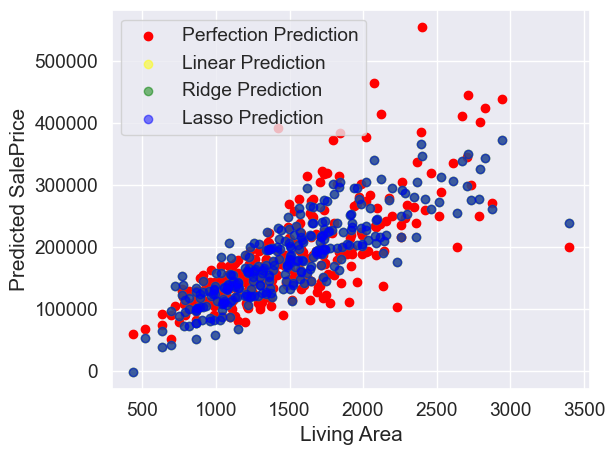

In [24]:
import matplotlib.pyplot as plt
col = 'GrLivArea'

plt.scatter(X_test[col], y_test, color = 'red', label = 'Perfection Prediction')

# Create a scatter plot for Lasso Regression
plt.scatter(X_test[col], linear_predictions, color = 'yellow', alpha= 0.5, label = 'Linear Prediction')
plt.scatter(X_test[col], ridge_predictions, color = 'green', alpha= 0.5, label = 'Ridge Prediction')
plt.scatter(X_test[col], lasso_predictions, color = 'blue', alpha= 0.5, label = 'Lasso Prediction')


plt.xlabel('Living Area')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.tight_layout()
plt.show()
# Show the plot


* How are weights calculated: [link](https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843)

* Why is Lasso harder on coefficients in comparison to Ridge? [link](https://online.stat.psu.edu/stat508/lesson/5/5.4)

* Regression requirements: [link](https://www.youtube.com/watch?v=0MFpOQRY0rw&ab_channel=zedstatistics)

* Linear regression in sklearn: [link](https://scikit-learn.org/stable/modules/linear_model.html#linear-models)

* Lasso Regression


### Add and convert categorical columns to numerical

In [42]:
# filter the dataset based on the following columns
columns_to_use = ['LotArea', 'YrSold', 'GarageArea', 'GarageYrBlt',
                  'GrLivArea', 'OverallQual', 'ExterQual', 'YearBuilt',
                  'MSZoning', 'KitchenQual',
                  'SalePrice']

# save the new dataset into df_sample
df = pd.read_csv(FILE_PATH)

df_sample = df[columns_to_use]

In [43]:
# take a look at the dataset
df_sample

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,SalePrice
0,8450,2008,548,2003.0,1710,7,Gd,2003,RL,Gd,208500
1,9600,2007,460,1976.0,1262,6,TA,1976,RL,TA,181500
2,11250,2008,608,2001.0,1786,7,Gd,2001,RL,Gd,223500
3,9550,2006,642,1998.0,1717,7,TA,1915,RL,Gd,140000
4,14260,2008,836,2000.0,2198,8,Gd,2000,RL,Gd,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,TA,1999,RL,TA,175000
1456,13175,2010,500,1978.0,2073,6,TA,1978,RL,TA,210000
1457,9042,2010,252,1941.0,2340,7,Ex,1941,RL,Gd,266500
1458,9717,2010,240,1950.0,1078,5,TA,1950,RL,Gd,142125


In [47]:
# look into the number of nulls we have
# (sort the values to have the emptiest column on top)
null_counts = df_sample.isnull().sum().sort_values(ascending=False)


null_counts

GarageYrBlt    81
LotArea         0
YrSold          0
GarageArea      0
GrLivArea       0
OverallQual     0
ExterQual       0
YearBuilt       0
MSZoning        0
KitchenQual     0
SalePrice       0
dtype: int64

In [51]:
# fillna with mean for: GarageYrBlt
garageyrblt_mean = df['GarageYrBlt'].mean()

df_sample.GarageYrBlt.fillna(garageyrblt_mean, inplace=True)

/var/folders/zg/p7fn91m16k3c924g51v1bzpw0000gn/T/ipykernel_50390/1382443550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample.GarageYrBlt.fillna(garageyrblt_mean, inplace=True)


In [52]:
# Check if nulls have been filled
null_counts = df_sample.isnull().sum()
null_counts

LotArea        0
YrSold         0
GarageArea     0
GarageYrBlt    0
GrLivArea      0
OverallQual    0
ExterQual      0
YearBuilt      0
MSZoning       0
KitchenQual    0
SalePrice      0
dtype: int64

In [50]:
# import the label encoder
from sklearn.preprocessing import LabelEncoder

# create a second dataset from the first dataset
df_transformed = df_sample.copy()

# define the categorical columns
cols = ('KitchenQual', 'ExterQual', 'MSZoning')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(df_transformed[c].values))
    df_transformed[c] = lbl.transform(list(df_transformed[c].values))



In [53]:
# look at the transformed version
# is everything looking good?
df_transformed


,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,SalePrice
0,8450,2008,548,2003.0,1710,7,2,2003,3,2,208500
1,9600,2007,460,1976.0,1262,6,3,1976,3,3,181500
2,11250,2008,608,2001.0,1786,7,2,2001,3,2,223500
3,9550,2006,642,1998.0,1717,7,3,1915,3,2,140000
4,14260,2008,836,2000.0,2198,8,2,2000,3,2,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,3,1999,3,3,175000
1456,13175,2010,500,1978.0,2073,6,3,1978,3,3,210000
1457,9042,2010,252,1941.0,2340,7,0,1941,3,2,266500
1458,9717,2010,240,1950.0,1078,5,3,1950,3,2,142125


In [64]:
# Now let's go back to the original dataset "df_sample" by saving it in df_transformed to try another type of encoding
df_transformed = df_sample.copy()
df_transformed

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,SalePrice
0,8450,2008,548,2003.0,1710,7,Gd,2003,RL,Gd,208500
1,9600,2007,460,1976.0,1262,6,TA,1976,RL,TA,181500
2,11250,2008,608,2001.0,1786,7,Gd,2001,RL,Gd,223500
3,9550,2006,642,1998.0,1717,7,TA,1915,RL,Gd,140000
4,14260,2008,836,2000.0,2198,8,Gd,2000,RL,Gd,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,TA,1999,RL,TA,175000
1456,13175,2010,500,1978.0,2073,6,TA,1978,RL,TA,210000
1457,9042,2010,252,1941.0,2340,7,Ex,1941,RL,Gd,266500
1458,9717,2010,240,1950.0,1078,5,TA,1950,RL,Gd,142125


In [65]:
from sklearn.preprocessing import OrdinalEncoder

order = ['Fa', 'TA', 'Gd', 'Ex']
columns_with_order = ['ExterQual', 'KitchenQual']

# Ensure df_transformed is a DataFrame and not a method or other object type
# Assuming df_transformed is your DataFrame, replace it with the actual DataFrame variable if it's different

# Process columns, apply OrdinalEncoder to categorical features
for col in columns_with_order:
    order_en = OrdinalEncoder(categories=[order])
    df_transformed[col] = order_en.fit_transform(df_transformed[[col]])


In [66]:
# take a look at the kitchQual in df_sample
df_sample.loc[:, 'KitchenQual'].values

array(['Gd', 'TA', 'Gd', ..., 'Gd', 'Gd', 'TA'], dtype=object)

In [67]:
# take a look at the kitchQual in df_transformed
df_transformed.loc[:, 'KitchenQual'].values

array([2., 1., 2., ..., 2., 2., 1.])

In [68]:
# Specify the columns to be one-hot encoded (MSZoning)
# Perform one-hot encoding
encoded_df=pd.get_dummies(df_transformed['MSZoning'])

# Concatenate the encoded columns with the original dataset
df_transformed = pd.concat([df_transformed, encoded_df], axis = 1)

# Display the modified dataset
df_transformed

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,MSZoning,KitchenQual,SalePrice,C (all),FV,RH,RL,RM
0,8450,2008,548,2003.0,1710,7,2.0,2003,RL,2.0,208500,False,False,False,True,False
1,9600,2007,460,1976.0,1262,6,1.0,1976,RL,1.0,181500,False,False,False,True,False
2,11250,2008,608,2001.0,1786,7,2.0,2001,RL,2.0,223500,False,False,False,True,False
3,9550,2006,642,1998.0,1717,7,1.0,1915,RL,2.0,140000,False,False,False,True,False
4,14260,2008,836,2000.0,2198,8,2.0,2000,RL,2.0,250000,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,2007,460,1999.0,1647,6,1.0,1999,RL,1.0,175000,False,False,False,True,False
1456,13175,2010,500,1978.0,2073,6,1.0,1978,RL,1.0,210000,False,False,False,True,False
1457,9042,2010,252,1941.0,2340,7,3.0,1941,RL,2.0,266500,False,False,False,True,False
1458,9717,2010,240,1950.0,1078,5,1.0,1950,RL,2.0,142125,False,False,False,True,False


In [69]:
# drop the columns you transformed and keep the converted versions
df_transformed.drop(columns=['MSZoning'], inplace=True)

In [70]:
# define the variables we want to use for X (everything except for 'SalePrice')
X_columns = [col for col in df_transformed.columns if col!='SalePrice']

# create X and y
X = df_transformed.loc[:, X_columns]
y =  df_transformed.loc[:, 'SalePrice']

# build the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# View X_train. Is everything looking good?
X_train

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,KitchenQual,C (all),FV,RH,RL,RM
254,8400,2010,294,1957.000000,1314,5,1.0,1957,1.0,False,False,False,True,False
1066,7837,2009,380,1993.000000,1571,6,2.0,1993,1.0,False,False,False,True,False
638,8777,2008,0,1978.506164,796,5,1.0,1910,1.0,False,False,False,True,False
799,7200,2007,240,1939.000000,1768,5,1.0,1937,2.0,False,False,False,True,False
380,5000,2010,308,1924.000000,1691,5,1.0,1924,2.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,9317,2007,440,2006.000000,1314,6,2.0,2006,2.0,False,False,False,True,False
1130,7804,2009,576,1981.000000,1981,4,1.0,1928,2.0,False,False,False,True,False
1294,8172,2006,572,1957.000000,864,5,1.0,1955,1.0,False,False,False,True,False
860,7642,2007,216,1925.000000,1426,7,2.0,1918,2.0,False,False,False,True,False


In [72]:
# Initialize and train a linear regression model
# Initialize and train a linear regression model
model = LinearRegression()
# Make predictions
lr = model.fit(X_train, y_train)
linear_predictions= model.predict(X_test)

# Evaluate the model

linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_rmae = np.sqrt(mean_squared_error(y_test, linear_predictions))

print(f"Mean Absolute Error {linear_mae}")
print(f"Root Mean Squared Error {linear_rmae}")


print("lr.coef_: ", lr.coef_)
print("lr.intercept_: ", lr.intercept_)
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Validation score: {:.2f}".format(lr.score(X_test, y_test)))

# underfitting



Mean Absolute Error 24122.961199708647
Root Mean Squared Error 38888.57581344025
lr.coef_:  [ 7.18874499e-01  2.32399407e+02  4.41456331e+01 -3.36614338e+01
  4.60649450e+01  1.74456916e+04  1.50004038e+04  2.23718449e+02
  1.50922756e+04 -4.69559298e+03 -4.76810352e+03  2.89381982e+03
  1.04292446e+04 -3.85936790e+03]
lr.intercept_:  -916525.7284691707
Training score: 0.78
Validation score: 0.80


In [73]:
# Initialize and train a Ridge regression model
model = Ridge(alpha=0.2)


# Make predictions
ridge = model.fit(X_train, y_train)
ridge_predictions= ridge.predict(X_test)

# Evaluate the model

ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_rmae = np.sqrt(mean_squared_error(y_test, ridge_predictions))

print(f"Mean Absolute Error {ridge_mae}")
print(f"Root Mean Squared Error {ridge_rmae}")

# Evaluate the model
print("Training score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Validation score: {:.2f}".format(ridge.score(X_test, y_test)))



Mean Absolute Error 24124.429889040348
Root Mean Squared Error 38890.70583632084
Training score: 0.78
Validation score: 0.80


In [74]:
# Initialize and train a Lasso regression model
model = Lasso(alpha= 0.2)

# Make predictions
lasso = model.fit(X_train, y_train)
lasso_predictions= lasso.predict(X_test)

# Evaluate the model

lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_rmae = np.sqrt(mean_squared_error(y_test, lasso_predictions))

print(f"Mean Absolute Error {lasso_mae}")
print(f"Root Mean Squared Error {lasso_rmae}")

# Evaluate the model
print("Training score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Validation score: {:.2f}".format(lasso.score(X_test, y_test)))

Mean Absolute Error 24123.316190490717
Root Mean Squared Error 38888.97325889124
Training score: 0.78
Validation score: 0.80


/Users/lizhifan/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


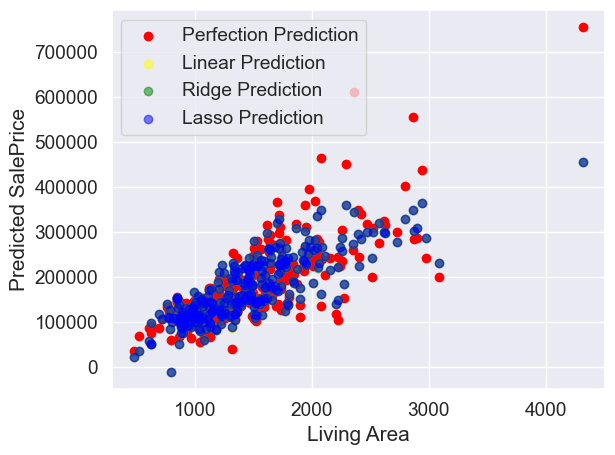

In [75]:
import matplotlib.pyplot as plt
col = 'GrLivArea'

plt.scatter(X_test[col], y_test, color = 'red', label = 'Perfection Prediction')

# Create a scatter plot for Lasso Regression
plt.scatter(X_test[col], linear_predictions, color = 'yellow', alpha= 0.5, label = 'Linear Prediction')
plt.scatter(X_test[col], ridge_predictions, color = 'green', alpha= 0.5, label = 'Ridge Prediction')
plt.scatter(X_test[col], lasso_predictions, color = 'blue', alpha= 0.5, label = 'Lasso Prediction')


plt.xlabel('Living Area')
plt.ylabel('Predicted SalePrice')
plt.legend()
plt.tight_layout()
plt.show()
# Show the plot


### Optional for now

### What if we didn't have normalized features?


In [76]:
# Calculate the mean and standard deviation for each feature
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)

# Normalize the features using z-score standardization
X_normalized = (X - mean) / std_dev

# Now, X_normalized contains your normalized features
X_normalized

,LotArea,YrSold,GarageArea,GarageYrBlt,GrLivArea,OverallQual,ExterQual,YearBuilt,KitchenQual,C (all),FV,RH,RL,RM
0,-0.207142,0.138777,0.351000,1.021157,0.370333,0.651479,1.052302,1.050994,0.735994,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
1,-0.091886,-0.614439,-0.060731,-0.104483,-0.482512,-0.071836,-0.689604,0.156734,-0.771091,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
2,0.073480,0.138777,0.631726,0.937776,0.515013,0.651479,1.052302,0.984752,0.735994,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
3,-0.096897,-1.367655,0.790804,0.812705,0.383659,0.651479,-0.689604,-1.863632,0.735994,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
4,0.375148,0.138777,1.698485,0.896086,1.299326,1.374795,1.052302,0.951632,0.735994,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.614439,-0.060731,0.854395,0.250402,-0.071836,-0.689604,0.918511,-0.771091,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
1456,0.266407,1.645210,0.126420,-0.021102,1.061367,-0.071836,-0.689604,0.222975,-0.771091,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
1457,-0.147810,1.645210,-1.033914,-1.563645,1.569647,0.651479,2.794208,-1.002492,0.735994,-0.083045,-0.215859,-0.105263,0.518133,-0.418955
1458,-0.080160,1.645210,-1.090059,-1.188432,-0.832788,-0.795151,-0.689604,-0.704406,0.735994,-0.083045,-0.215859,-0.105263,0.518133,-0.418955


In [77]:
#  other ways of doing this
from sklearn.preprocessing import StandardScaler

# Assuming you have a numpy array called 'X' containing your features
# X.shape should be (number_of_samples, number_of_features)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data and transform the features
X_normalized = scaler.fit_transform(X)

# X_normalized contains your z-score standardized features
X_normalized

array([[-0.20714171,  0.13877749,  0.35100032, ..., -0.10526316,
         0.51813339, -0.41895507],
       [-0.09188637, -0.61443862, -0.06073101, ..., -0.10526316,
         0.51813339, -0.41895507],
       [ 0.07347998,  0.13877749,  0.63172623, ..., -0.10526316,
         0.51813339, -0.41895507],
       ...,
       [-0.14781027,  1.64520971, -1.03391416, ..., -0.10526316,
         0.51813339, -0.41895507],
       [-0.08016039,  1.64520971, -1.09005935, ..., -0.10526316,
         0.51813339, -0.41895507],
       [-0.05811155,  0.13877749, -0.9216238 , ..., -0.10526316,
         0.51813339, -0.41895507]])

In [78]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a numpy array called 'X' containing your features
# X.shape should be (number_of_samples, number_of_features)

# Create a MinMaxScaler instance (by default, scales to [0, 1])
scaler = MinMaxScaler()

# Fit the scaler to your data and transform the features
X_normalized = scaler.fit_transform(X)

# X_normalized contains your min-max scaled features
X_normalized

array([[0.0334198 , 0.5       , 0.3864598 , ..., 0.        , 1.        ,
        0.        ],
       [0.03879502, 0.25      , 0.32440056, ..., 0.        , 1.        ,
        0.        ],
       [0.04650728, 0.5       , 0.42877292, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.03618687, 1.        , 0.17771509, ..., 0.        , 1.        ,
        0.        ],
       [0.03934189, 1.        , 0.16925247, ..., 0.        , 1.        ,
        0.        ],
       [0.04037019, 0.5       , 0.19464034, ..., 0.        , 1.        ,
        0.        ]])